# Епидемиолошки модел *SIR*

Епидемиолошки *SIR* модел популацију дели у три групе:
- $S$ - они који се још увек нису заразили и подложни су заразил
- $I$ - активно заражени који су још увек могу заразити остале
- $R$ - опорављени који се не могу поново заразити нити могу ни да заразе остале

Збир ове три вредности представљају укупну популацију, коју ћемо означити са $N$, што значи

$$N=S+I+R$$

Укопан број заражених је онда збир броја активно заражених и оних који су се заразили и опоравили:

$$I+R=N-S$$

Параметри за *SIR* модел модел су:

- $\beta$ - колико у јединици времена једна заразна особа у просеку зарази других особа у случају када би су сви били подложни зарази
- $\gamma$ - колики део заражених особа се у просеку опорави у јединици времнена 

Као што видимо, *SIR* није заснован на репродукционом броју $R$ и просечном генерацијском интервалу $T$, већ на другачијем погледу на основне параметре. *SIR* модел не узима у обзир период инкубације, тј. да постоје они који су заражени, а још увек нису заразни, већ рачуна као да су заражене особе одмах постале заразне. Такође у *SIR* моделу, ако нпр. имамо 1000 заражених, онда у наредном дану очекујемо исти број опорављених без обзира колико дуго трају болести код тих 1000 заражених. Матаматички модели могу укључити и претпоставке које не морају да савршено осликавају реалност, па у неким случајевима буду више, а у неким мање прецизни.

Ако за јединицу времена узмемо један дан, онда то значи:
- дневна  промена за $R$ је приближно $\gamma I$
- дневна промена укупног броја заражених је приближно $\beta I{S\over N}$, што је заправо $\beta I$ кориговано за степен колективног имунитета
- колико се укупан број заражених повећа толико се $S$ смањи, што значи да је дневна промена за $S$ приближно $-\beta I{S\over N}$
- Пошто се $S+I+R$ не мења (увек је једнако $N$), збир дневних промена за $S$,$I$ и $R$ је увек нула, из чега произилази да је дневна промена за $I$ приближно $\beta I{S\over N} - \gamma I$

Прецизнија математичка формулација би се изразила системом диференцијалних једначина, али је суштина иста.

У наредним ћелијама је конкретна рачуница.

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

Први ћемо израчунати функције $S(t)$, $I(t)$ и $R(t)$

In [2]:
# Neka je populacija 1000 osoba
N = 1000  

# Na početku imamo samo nultog pacijenta
I0 = 1
R0 = 0  
S0 = N - I0 - R0

y0 = (S0, I0, R0)

# vrednosti parametara
beta= 0.12
gama = 0.02 

# posmmatraćemo period od 200 dana
t = np.linspace(0, 200, 201)

# funkcija koja predstavlja sistem u skladu odnosima dnevnih promena koje smo prethodno opisali
def sistem_jednacina(y, t, N, beta, gamma):
    S, I, R = y
    Sp = -beta * S * I / N
    Ip = beta * S * I / N - gama * I
    Rp = gama * I
    return (Sp, Ip, Rp)

# Krive za S,R,I se dobijaju numeričkim rešavanje sistema diferencijalnih jednačina
ret = odeint(sistem_jednacina, y0, t, args=(N, beta, gama))
S, I, R = ret.T

Затим ћемо направити графикон криве $S(t)$, $I(t)$ и $R(t)$

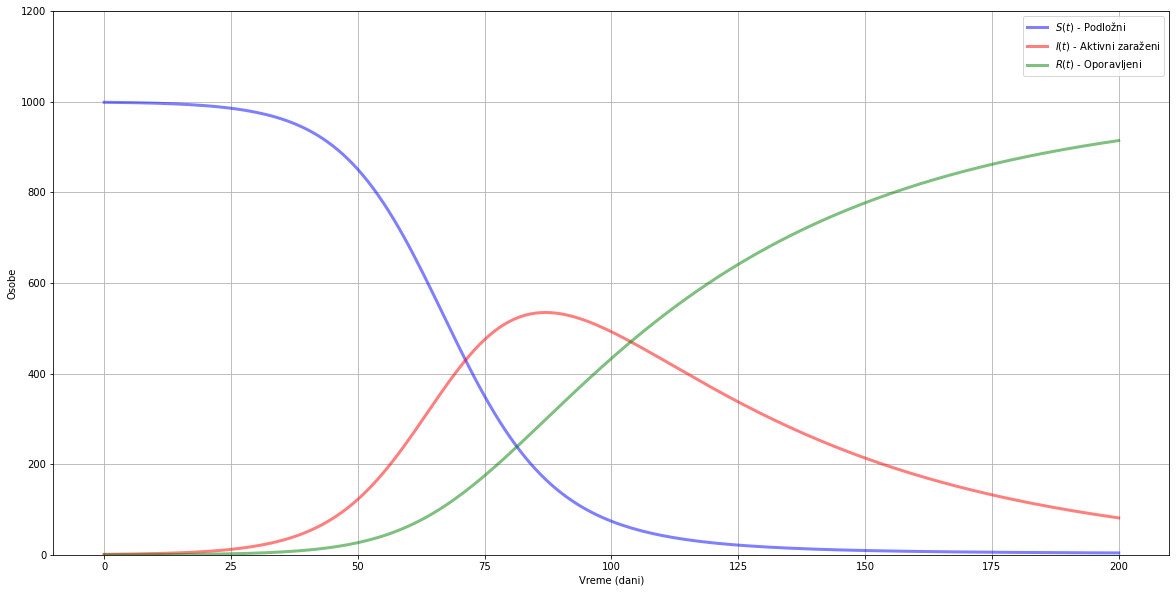

In [3]:

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(111)
ax.plot(t, S, 'b', alpha=0.5, lw=3, label='$S(t)$ - Podložni')
ax.plot(t, I, 'r', alpha=0.5, lw=3, label='$I(t)$ - Aktivni zaraženi')
ax.plot(t, R, 'g', alpha=0.5, lw=3, label='$R(t)$ - Oporavljeni')
ax.set_xlabel('Vreme (dani)')
ax.set_ylabel('Osobe')
ax.set_ylim(0,1200)
ax.grid(True)
ax.legend()
plt.show()

Sada ćemo da izračunamo i funkcije $g(t)$ i $f(t)$ za kretanje ukupnog i dnevnog broja zaraženih

In [4]:
g = R+I
f = np.gradient(g)

I nacrtaćemo grafikone za $g(t)$ i $f(t)$

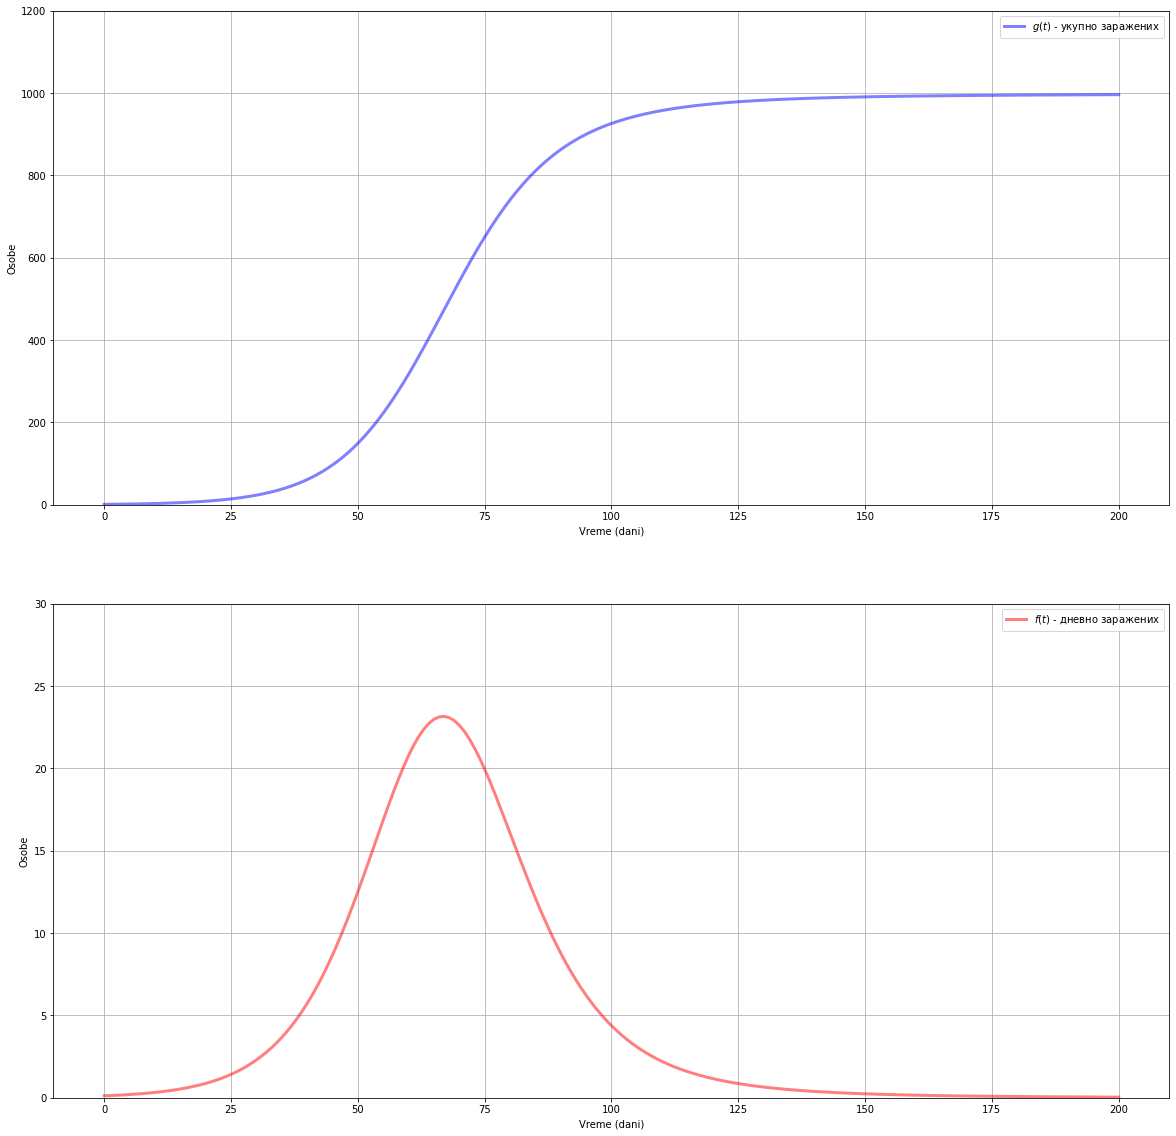

In [5]:
fig = plt.figure(figsize=(20,20))
for pos, kriva, boja, max_y, label in [(211,g,'b',1200, '$g(t)$ - укупно заражених'),(212, f,'r',30, '$f(t)$ - дневно заражених')]:
    ax = fig.add_subplot(pos)
    ax.plot(t, kriva, boja, alpha=0.5, lw=3, label=label)
    ax.set_xlabel('Vreme (dani)')
    ax.set_ylabel('Osobe')
    ax.set_ylim(0,max_y)
    ax.grid(True)
    ax.legend()
plt.show()